# SVD를 활용한 이미지 압축

In [1]:
import imageio.v2 as imageio
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt

grayscale_cat_as_matrix = imageio.imread('data/grayscale_cat.jpg')

In [2]:
grayscale_cat_as_matrix

Array([[  6,   4,   6, ...,  54,  79, 102],
       [  6,   6,   5, ...,  51,  78, 102],
       [  5,   8,   7, ...,  51,  82, 103],
       ...,
       [ 36,  35,  34, ...,  73,  76,  75],
       [ 34,  35,  35, ...,  73,  76,  77],
       [ 38,  37,  35, ...,  74,  76,  75]], dtype=uint8)

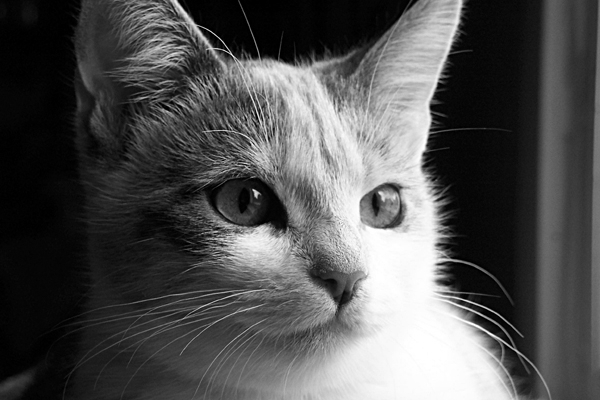

In [3]:
Image.fromarray(grayscale_cat_as_matrix,'L')

## -----------------------------------------------------------------------------------------------------------------

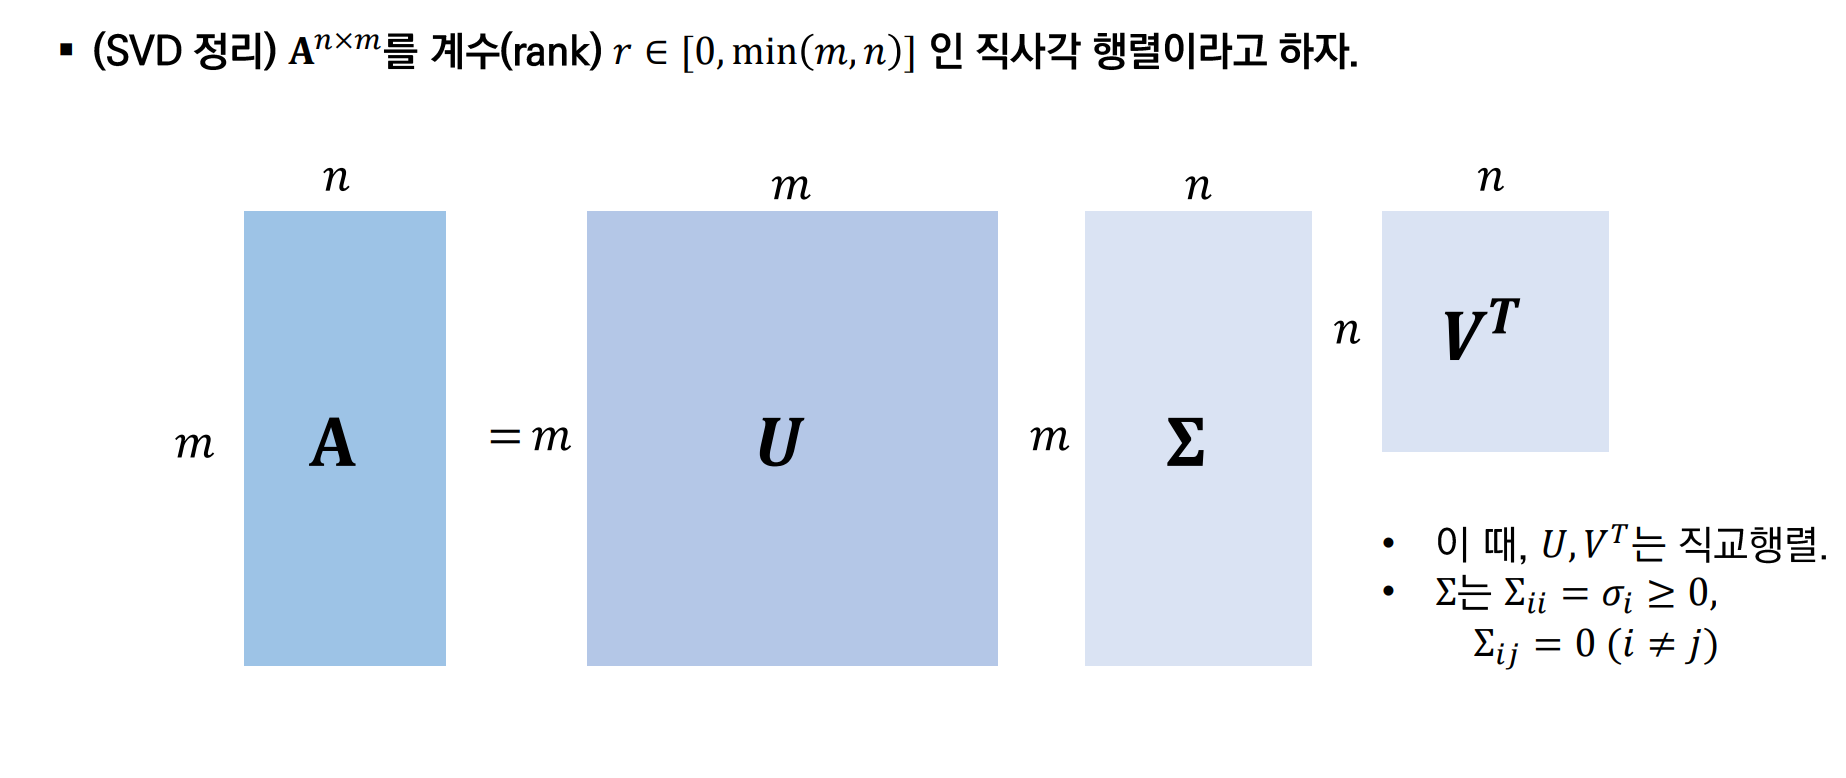

## -----------------------------------------------------------------------------------------------------------------

In [6]:
U, S, V = np.linalg.svd(grayscale_cat_as_matrix, full_matrices=True)

In [184]:
grayscale_cat_as_matrix.shape

(400, 600)

In [185]:
U.shape

(400, 400)

In [186]:
S.shape
# 대객성분에만 고유값 넣고 나머지에는 0넣기 때문에 고유값 400개만 줌

(400,)

In [187]:
V.shape

(600, 600)

## -----------------------------------------------------------------------------------------------------------------

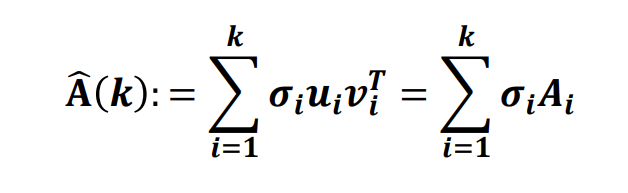

## -----------------------------------------------------------------------------------------------------------------

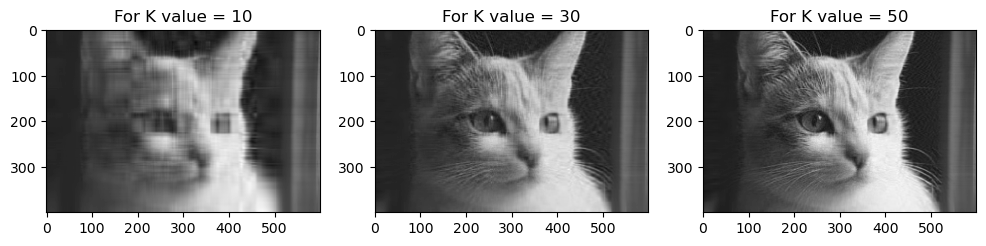

In [7]:
plt.figure(figsize=(12,6))
k_values=[10,30,50]
for i in range(len(k_values)):
    low_rank = U[:, :k_values[i]] @ np.diag(S[:k_values[i]]) @ V[:k_values[i], :]
    plt.subplot(2,3,i+1),
    plt.imshow(low_rank, cmap='gray'),
    plt.title(f"For K value = {k_values[i]}")
    # @: 행렬곱 np.diag()대각행렬 -> (400,)인 S행렬을 대각행렬로 변환후 행렬곱 진행
    # (400,10) * (10,10) *(10,600) -> (400,600)의 이미지
    # 2*3크기의 그림 그림

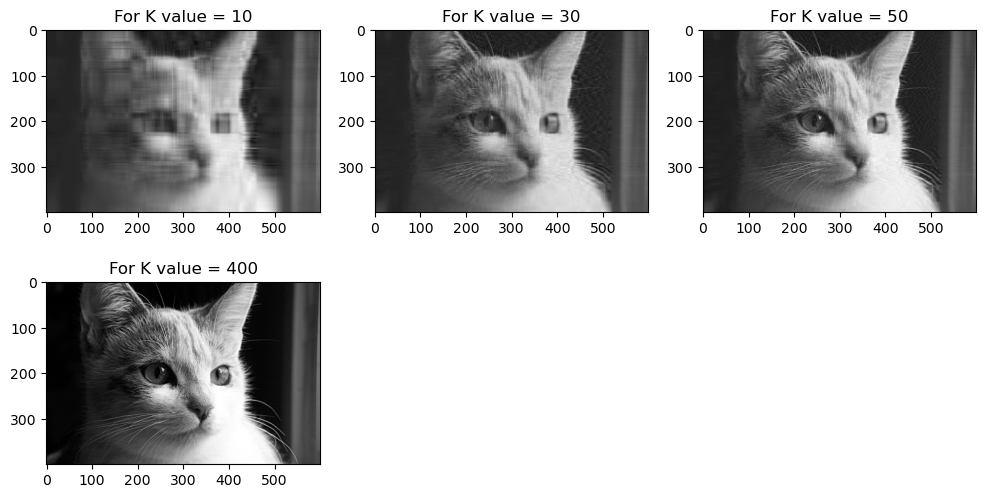

In [8]:
plt.figure(figsize=(12,6))
k_values=[10,30,50,400]
for i in range(len(k_values)):
    low_rank = U[:, :k_values[i]] @ np.diag(S[:k_values[i]]) @ V[:k_values[i], :]
    plt.subplot(2,3,i+1),
    plt.imshow(low_rank, cmap='gray'),
    plt.title(f"For K value = {k_values[i]}")